In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date

In [2]:
df = pd.read_json('ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [3]:
 print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB
None


### Data cleaning and imputation

Replace the missing values in avg_rating_by_driver with the median rating

In [4]:
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(np.nanmedian(df['avg_rating_by_driver']))

Similarly, replace the mssign values in avg_rating_of_driver with the median rating

In [5]:
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(np.nanmedian(df['avg_rating_of_driver']))

The last column that has missing value is the phone column. Since the number of missings value is small compared to the available data, we can consider to simply drop the missing value or replace it with others. 

In [6]:
df['phone'] = df['phone'].fillna('others')

Do a santiy check to make sure all the missing values have been dealt with

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB
None


In [8]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,4.650038,1.074764,8.849536,60.926084,5.796827,4.779050
std,3.792684,0.575601,0.222336,19.958811,37.081503,5.707357,0.445974
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.500000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


We can see that there is no missing values now. Next let's create the target column based on the last_trip_date (1 for retained, 0 for not retained)

In [9]:
# convert signup_date and last_trip_date to datetime object
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

Get the statistics for the last_trip_date column

In [10]:
df.last_trip_date.describe()

C:\Users\Yiming Lai\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

So the last day is 2014-07-01, we will classify the user with last_trip_date later than 2014-06-01 to be retained

In [11]:
df['retained'] = (df['last_trip_date'] >= '2014-06-01').astype('int')

Re-check the data frame

In [12]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


We can also get the retained rate

In [13]:
print('The retained rate is {}%'.format(100*df.retained.sum()/len(df.retained)))

The retained rate is 37.608%


### Data visualization

Check correlation for the numerical variables

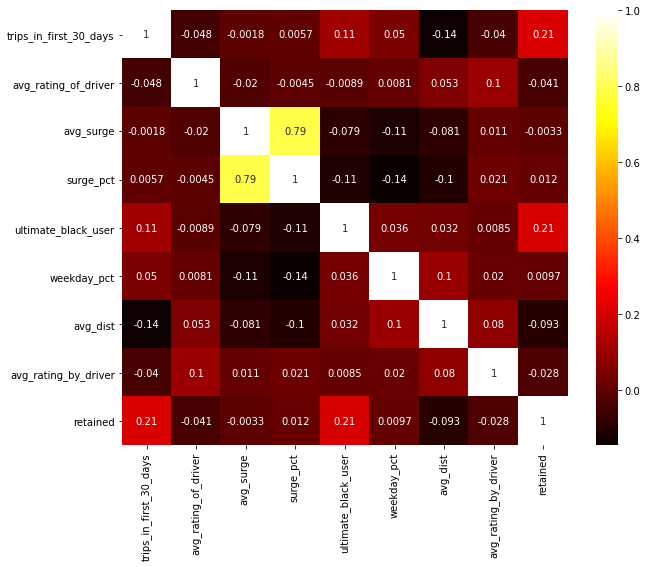

In [14]:
corr = df.corr()
plt.figure(figsize=(10,8))
_=sns.heatmap(corr, cmap='hot', annot = True)

Let's examine the categorical variables city and phone using countplot

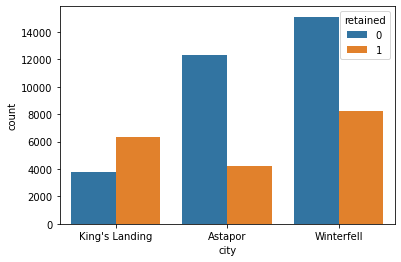

In [15]:
_=sns.countplot(x="city", hue="retained", data=df)

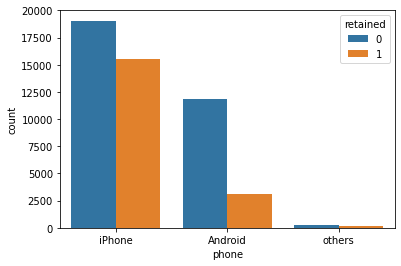

In [16]:
_=sns.countplot(x="phone", hue="retained", data=df)

Interestingly, users from King's Landing are more likely to be retained. Also, users using iPhone also have higher retained rate. 

### Modeling

In [17]:
# import necessary packages
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, plot_confusion_matrix

Drop the signup_date and last_trip_date and convert the categorical variable into dummy variables

In [18]:
df_clean = df.copy()
df_clean = df_clean.drop(['signup_date','last_trip_date'],axis=1)
df_clean = pd.get_dummies(df_clean)
df_clean

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_others
0,4,4.7,1.10,15.4,True,46.2,3.67,5.0,1,0,1,0,0,1,0
1,0,5.0,1.00,0.0,False,50.0,8.26,5.0,0,1,0,0,1,0,0
2,3,4.3,1.00,0.0,False,100.0,0.77,5.0,0,1,0,0,0,1,0
3,9,4.6,1.14,20.0,True,80.0,2.36,4.9,1,0,1,0,0,1,0
4,14,4.4,1.19,11.8,False,82.4,3.13,4.9,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,5.0,1.00,0.0,False,100.0,5.63,4.2,1,0,1,0,0,1,0
49996,1,4.9,1.00,0.0,False,0.0,0.00,4.0,0,1,0,0,0,1,0
49997,0,5.0,1.00,0.0,True,100.0,3.86,5.0,0,0,0,1,1,0,0
49998,2,3.0,1.00,0.0,False,100.0,4.58,3.5,0,1,0,0,0,1,0


In [19]:
# prepare test and train set
X = df_clean.drop(['retained'],axis = 1).values
y = df_clean['retained'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True, stratify = y)

In [20]:
# Initialize model
lr = LogisticRegression(solver='liblinear', random_state=0)
knn = Pipeline(steps=[('scaler',StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=2))])
svc = Pipeline(steps=[('scaler',StandardScaler()), ('svc', SVC())])
rf = RandomForestClassifier(random_state = 0)

In [21]:
# setup hyperparameters for model tuning

param_grid_lr = {'penalty':['l1','l2'], 
                 'C':[0.1,1,10,100]}
param_grid_knn = {'knn__n_neighbors':np.arange(1,20)}
param_grid_svc = {'svc__C':[0.1, 1, 10, 100], 
                  'svc__gamma':[0.1, 1, 10, 100]}
param_grid_rf = {'n_estimators':[200, 500,1000], 
                 'criterion':['gini','entropy'],
                 'max_depth':[5,10,15,20], 
                 'min_samples_split':[3,5,10],
                 'min_samples_leaf':[3,5,10,15]}

In [22]:
# function for training

def train(name, model, param_grid):
    
    n_param = np.prod([len(j) for i, j in param_grid.items()])
    

    cv = RandomizedSearchCV(model, param_distributions = param_grid, n_iter = int(n_param/2), cv = 10)        
    cv.fit(X_train, y_train)
    print(name)
    print('Best parameters: {}'.format(cv.best_params_))
    
    y_pred = cv.predict(X_test)
    
    
    
    print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
    print('Precision: {}'.format(precision_score(y_test, y_pred)))
    print('Recall: {}'.format(recall_score(y_test,y_pred)))
    
    # ROC-AUC
    
    if name != 'SVM':
        y_pred_prob = cv.predict_proba(X_test)[:,1]
        print('AUC: {}'.format(roc_auc_score(y_test, y_pred_prob)))
        fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
        plt.plot([0,1], [0,1], 'k--')
        plt.plot(fpr, tpr, label=name)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('{} ROC Curve'.format(name))
        plt.show()
    
    # plot confusion_matrix
    plot_confusion_matrix(cv, X_test, y_test,
                         display_labels=['not retained','retained'],
                         cmap=plt.cm.Blues,
                         normalize='true')
    plt.title('{} confusion matrix'.format(name))
    plt.show()

Logistic Regression
Best parameters: {'penalty': 'l1', 'C': 0.1}
Accuracy: 0.7149
Precision: 0.6642599277978339
Recall: 0.4892315873437915
AUC: 0.7537562414023103


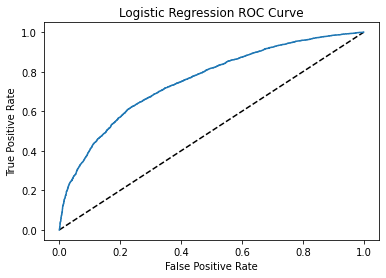

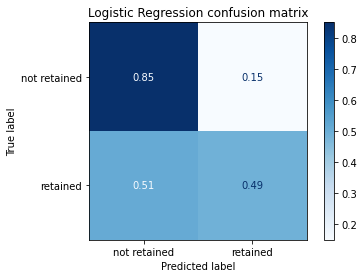

K Nearest Neighbors
Best parameters: {'knn__n_neighbors': 15}
Accuracy: 0.7606
Precision: 0.7015629607785314
Recall: 0.6325445360276523
AUC: 0.8190480121376292


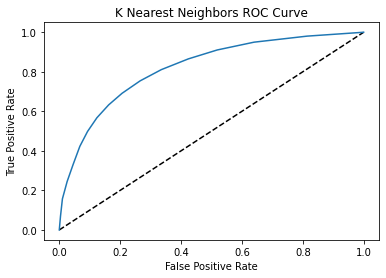

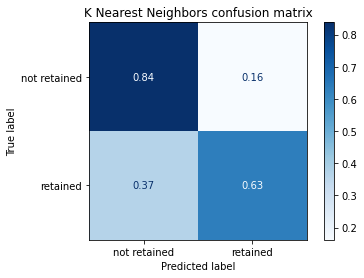

SVM
Best parameters: {'svc__gamma': 0.1, 'svc__C': 100}
Accuracy: 0.7706
Precision: 0.7245179063360881
Recall: 0.6293538952406275


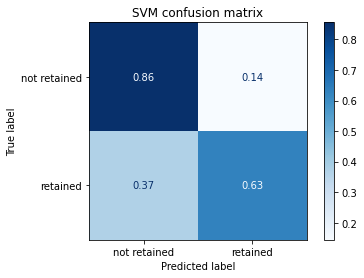

Random Forest
Best parameters: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 15, 'max_depth': 15, 'criterion': 'gini'}
Accuracy: 0.7867
Precision: 0.7532669570628501
Recall: 0.6437117787822387
AUC: 0.8524049069249409


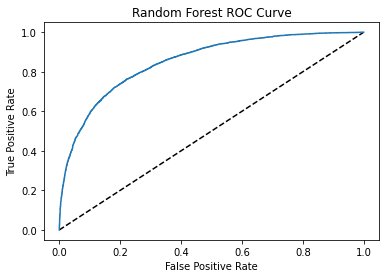

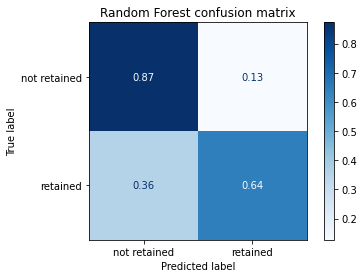

In [23]:
train('Logistic Regression', lr, param_grid_lr)

train('K Nearest Neighbors', knn, param_grid_knn)

train('SVM', svc, param_grid_svc)

train('Random Forest', rf, param_grid_rf)

Since we want to identify all the users who are more likely to be inactive in the future and then maybe offer some incentive to keep those users, we are going to use precision (less false positive) and AUC as the key metrics. For this reason, we will use Random Forest for the future prediction. Note that the cross validation choose some parameters that are actually at the edge of the parameters grid, such as the n_estimators and min_samples_leaf. It would be worthy trying even wider parameter space if we want to furhter improve the performance of our model.